CRIME DATASET

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

READ DATA

In [14]:
Data = pd.read_csv('drive/MyDrive/ML2022/sensor_readings_4.csv')
D=Data.to_numpy()
dim=np.shape(D)
print(dim)
DF=np.copy(D)

(5456, 5)


In [15]:
counter=0
for i in range(dim[0]):
  if D[i,dim[1]-1] == 'Slight-Right-Turn' or D[i,dim[1]-1] == 'Slight-Left-Turn':
    DF=np.delete(DF,(counter), axis=0)
    counter=counter-1
  counter=counter+1
DF = np.where(DF == 'Move-Forward' , -1, DF)
DF = np.where(DF == 'Sharp-Right-Turn', 1, DF)
print(DF)

[[0.753 0.457 2.323 0.442 1]
 [0.744 0.462 2.321 0.449 1]
 [0.735 0.467 2.315 0.457 1]
 ...
 [0.873 0.642 1.053 1.105 1]
 [0.967 0.635 1.034 1.118 -1]
 [0.854 0.628 1.016 1.168 1]]


EDA

In [ ]:
fig, ax = plt.subplots()
found=0
i=0
while found==0:
  if DF[i,4] == 0:
    found=1
    plt.axvline(x=DF[i,2],color='r')
    plt.axvline(x=-DF[i,1],color='r')
    plt.axhline(y=DF[i,0], color='r')
    plt.axhline(y=-DF[i,3], color='r')
    ax.plot(0,0,'yo')
    ax.set_title('MoveForward')
  i=randint(0, np.shape(DF)[0])

In [ ]:
fig, ax = plt.subplots()
found=0
i=0
while found==0:
  if DF[i,4] == 1:
    found=1
    plt.axvline(x=DF[i,2],color='r')
    plt.axvline(x=-DF[i,1],color='r')
    plt.axhline(y=DF[i,0], color='r')
    plt.axhline(y=-DF[i,3], color='r')
    ax.plot(0,0,'yo')
    ax.set_title('Sharp-Right-Turn')
  i=randint(0, np.shape(DF)[0])

In [22]:
dim=np.shape(DF)
print(dim)
il=round(0.40*dim[0])
i=np.random.permutation(dim[0])
X=DF[i[0:il],0:dim[1]-1]
Y=DF[i[0:il],dim[1]-1]
Y=Y.astype('int')
print(Y[0:10])
print(X[0:10,:])
XT=DF[i[il+1:dim[0]],0:dim[1]-1]
YT=DF[i[il+1:dim[0]],dim[1]-1]
YT=YT.astype('int')


(4302, 5)
[ 1  1 -1  1 -1 -1 -1 -1  1 -1]
[[0.501 0.445 1.821 1.034]
 [0.765 0.681 1.369 0.545]
 [1.471 0.676 2.246 1.115]
 [0.784 0.76 1.498 0.847]
 [1.731 0.769 1.343 0.456]
 [3.288 0.79 1.466 0.421]
 [1.328 0.717 2.986 0.885]
 [0.913 0.768 2.848 5.0]
 [0.792 0.886 2.363 0.926]
 [2.81 0.662 1.598 0.88]]


NORMALIZE DATA

In [17]:
scalerX = preprocessing.MinMaxScaler()
X = scalerX.fit_transform(X)
XT = scalerX.transform(XT)

MODEL SELECTION (HYPERPARAMETER TUNING)

In [7]:
grid = {'C':        np.logspace(-6,4,10),
        'kernel':   ['rbf'],
        'gamma':    np.logspace(-6,4,10)}
MS = GridSearchCV(estimator = SVC(),
                  param_grid = grid,
                  scoring = 'balanced_accuracy',
                  cv = 10,
                  verbose = 0)
H = MS.fit(X,Y)

KeyboardInterrupt: ignored

TRAIN MODEL

In [ ]:
M = SVC(C = H.best_params_['C'],
        kernel = H.best_params_['kernel'],
        gamma = H.best_params_['gamma'])
M.fit(X,Y)

SVC(C=10000.0, gamma=4.641588833612782)

TEST SET

In [ ]:
YF = M.predict(XT)
confusion_matrix(YT,YF)

array([[325,   1],
       [  1, 317]])

DECISION TREE

In [23]:
maxDepth=3
grid = {'min_samples_leaf': [8,16,32,64,96,128]}
MS = GridSearchCV(estimator = DecisionTreeClassifier(),
                  param_grid = grid,
                  scoring = 'neg_mean_absolute_error',
                  cv = 10,
                  verbose = 0)
H = MS.fit(X,Y)
M = DecisionTreeClassifier(min_samples_leaf=H.best_params_['min_samples_leaf'],
                           max_depth=maxDepth)
M.fit(X,Y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=8)

In [24]:
text_representation = tree.export_text(M)
print(text_representation)

|--- feature_0 <= 0.90
|   |--- class: 1
|--- feature_0 >  0.90
|   |--- class: -1



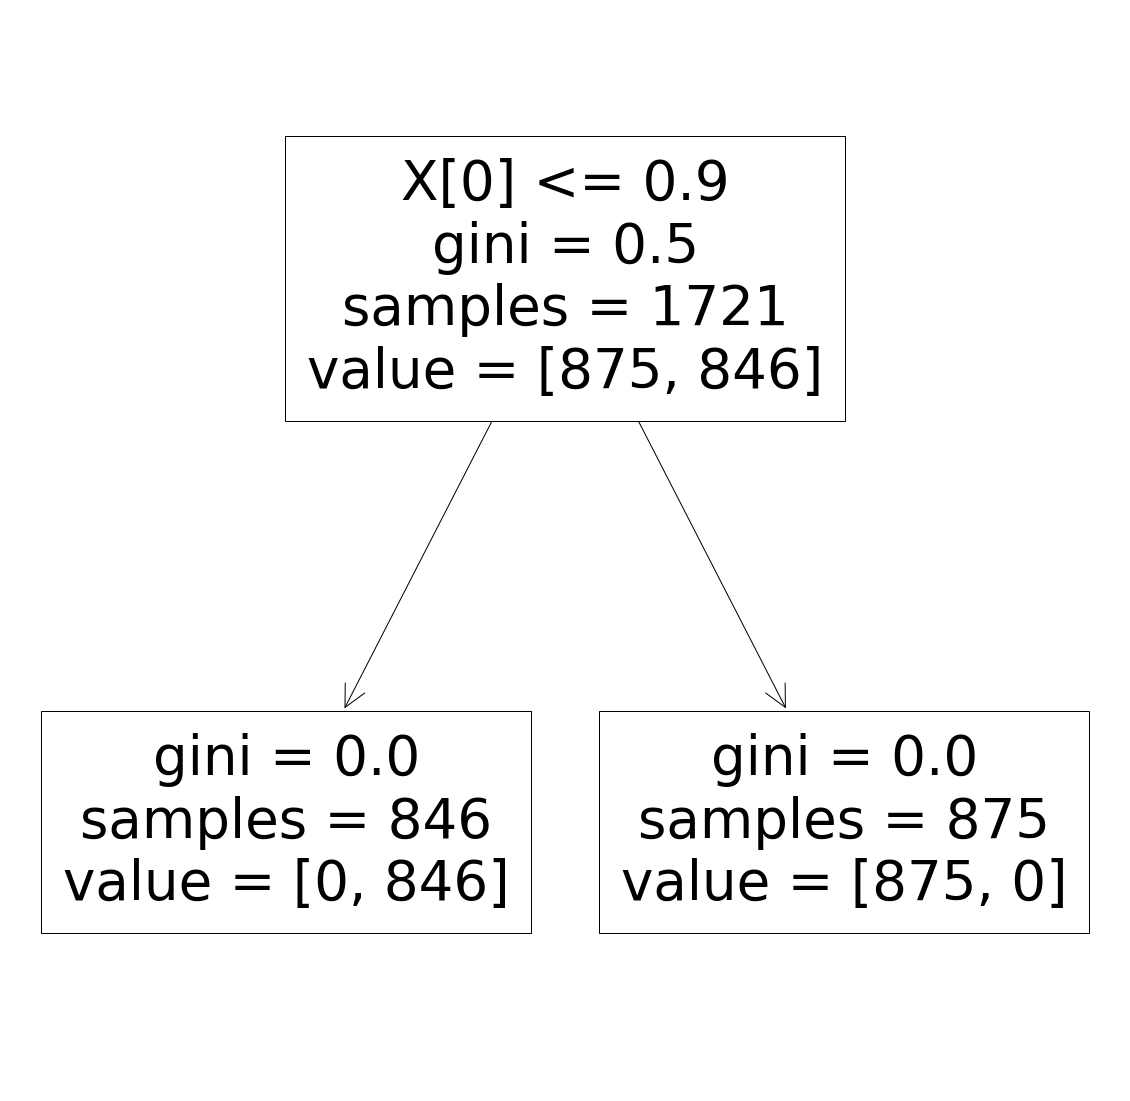

In [25]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(M)

In [26]:
YF = M.predict(XT)
confusion_matrix(YT,YF)

array([[1329,    0],
       [   0, 1251]])